# Decision Tree

---


Desenvolveremos, neste notebook, algumas aplicações envolvendo a Decision Tree (Árvore de Decisão). Como ferramentas de implementação, estaremos usando as bibliotecas `pandas`, `matplotlib` e a função `DecisionTreeClassifier` da biblioteca `sklearn`. Como bases de dados, utilizaremos a relação entre alguns atributos previsores e a incidência de diabetes. Por fim, plotamos gráficos que representam os resultados obtidos após a realização das predições com o `metrics`

## Aplicação de Decision Tree

---

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

Vamos ler o nosso banco de dados e o visualizar.

In [ ]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# Carregando o dataset
data = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv", header=None, names=col_names)
data

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Em seguida, vamos separar as variáveis em rótulo `label` e em previsores `feature`

In [ ]:
# Divisão do dataset entre previsores e classe
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = data[feature_cols]
y = data.label

Vamos separar nosso banco de dados em treino (70%) e teste (30%)

In [ ]:
# Separação dos dados entre treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
# Criando a Árvore de decisão
clf = DecisionTreeClassifier()

# Treinando o modelo
clf = clf.fit(X_train,y_train)

# Validando o modelo com os dados de teste
y_pred = clf.predict(X_test)

Calculamos a acurácia (quanto ele acertou entre todas as predições) do nosso modelo da Árvore de decisão

In [ ]:
# Quão correto o modelo está em relação à base de dados de teste
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.670995670995671


A partir do `sklearn` vamos importar a matriz de confusão, para visualizar a frequência dos verdadeiros positivos, falsos positivos, falsos verdadeiros e falsos negativos.

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[114  32]
 [ 44  41]]


Vamos instalar as bibliotecas `graphviz` e `pydotplus` para plotar nossa Árvore de decisão.

In [ ]:
!pip install graphviz
!pip install pydotplus

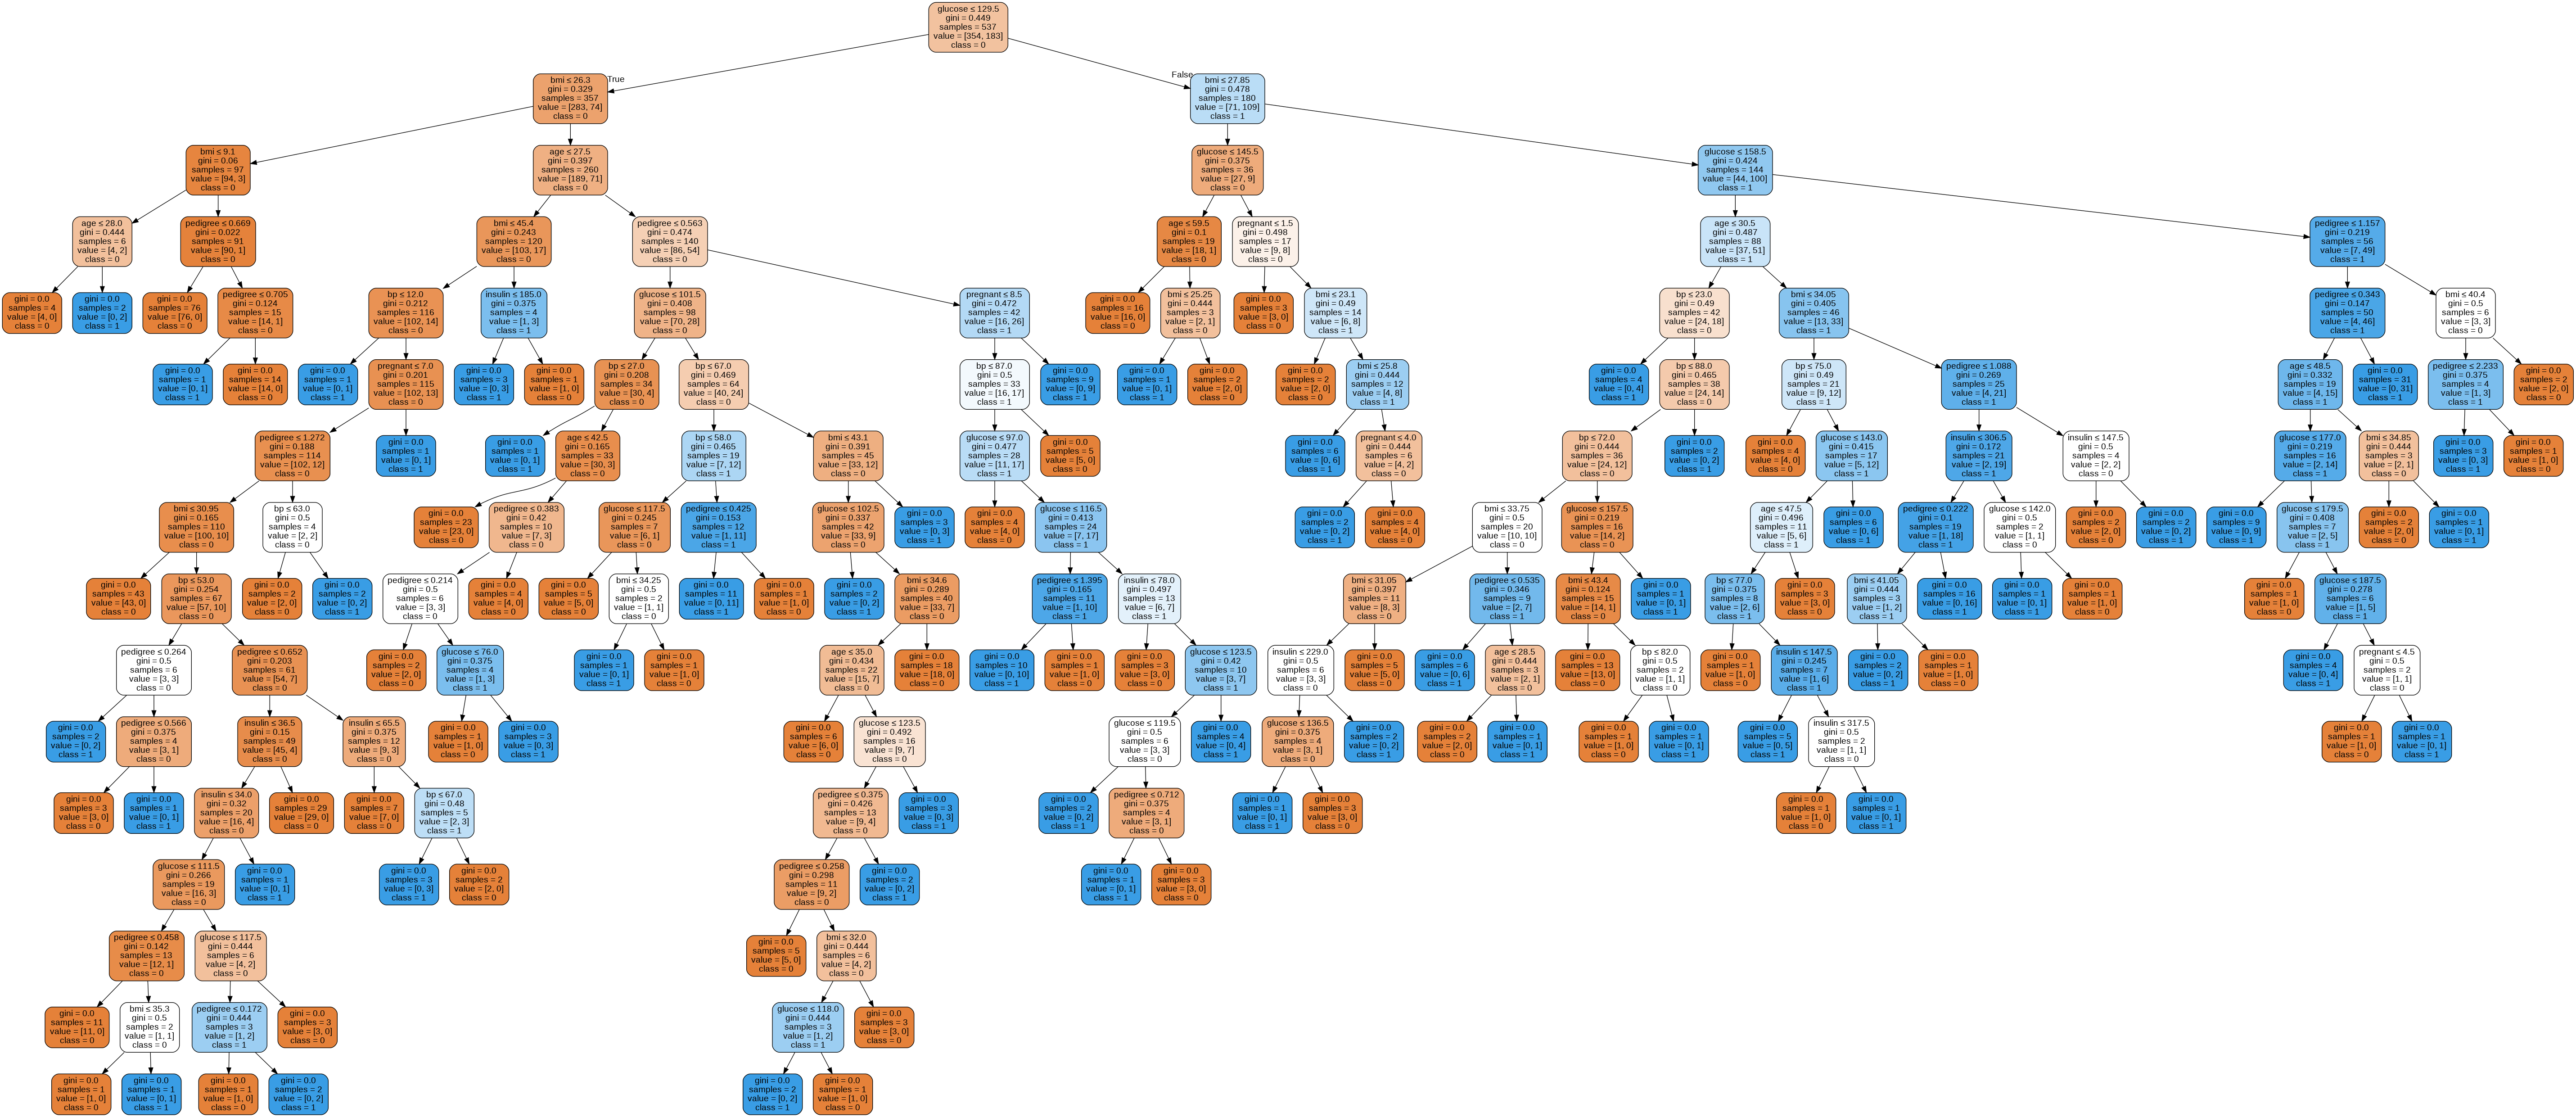

In [ ]:
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())